In [2]:
import tensorflow as tf


In [1]:
import matplotlib.pyplot as plt
import keras

In [3]:
import numpy as np

In [4]:
from sklearn.datasets import load_sample_image

In [5]:
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255

In [6]:
images = np.array([china,flower])

In [7]:
batch_size, height, width, channels = images.shape

In [8]:
filters = np.zeros(shape=(7,7,channels, 2), dtype=np.float32)
filters[:,3,:,0]
filters[3,:,:,1]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [9]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

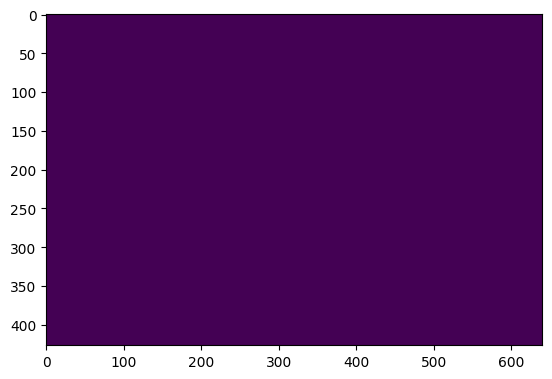

In [21]:
plt.imshow(outputs[0, :, :, 0]) # plot 1st image's 2nd feature map
plt.show()

In [12]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [14]:
output = tf.nn.max_pool(images, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3),padding="VALID")

In [18]:
output.shape


TensorShape([2, 427, 640, 1])

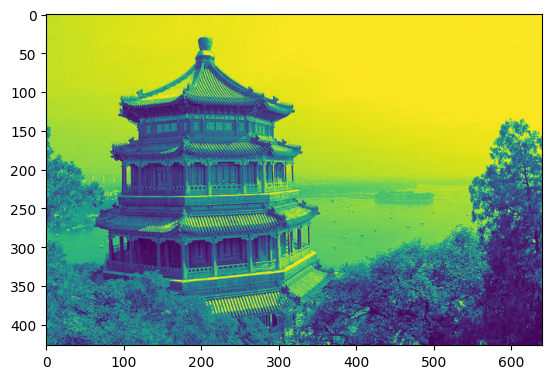

In [20]:
plt.imshow(output[0, :, :, 0])
plt.show()

In [22]:
depth_pool = keras.layers.Lambda(
lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3),
padding="VALID"))

Simple CNN model for MNIST Dataset

In [31]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [42]:
X_test.shape

(10000, 28, 28)

In [32]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="SAME", input_shape = [28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [40]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
model.fit(X_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9633 - loss: 0.1614


In [51]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")


Test accuracy: 0.9852, Test loss: 0.0626
